# Import Package

In [28]:
import os
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("data/cust_Segmentation.csv")
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


`Customer Id`<br>
`Age`: Age of customer<br>
`Edu`: Education level of the customers<br>
`Years Employed`: Number of years customer has been employed at their current job.<br>
`Income`: This represent the income of the customer.<br>
`Card dept`: Amount of debt a customer has accumulated on their credit card.<br>
`Other Debt`:

In [11]:
df.drop("Address", axis=1, inplace=True)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [12]:
df_cust = df[["Years Employed", "DebtIncomeRatio"]]
df_cust.head()

,Years Employed,DebtIncomeRatio
0,6,6.3
1,26,12.8
2,10,20.9
3,4,6.3
4,31,7.2


In [18]:
model = KMeans(n_clusters = 2, random_state=0)
model.fit(df_cust)

KMeans(n_clusters=2, random_state=0)

In [20]:
silhouette_score(df_cust, model.fit_predict(df_cust))

0.365671550961741

In [36]:
Ks = range(1, 10)
km = [KMeans(n_clusters=i) for i in Ks]
score = [km[i].fit(df_cust).score(df_cust) for i in range(len(km))]
score

[-77335.91728235292,
 -51767.117331564914,
 -30233.508710424532,
 -24612.947656612883,
 -20388.867054451803,
 -16740.341534494302,
 -14873.811795897771,
 -13390.307669555179,
 -11387.838336023477]

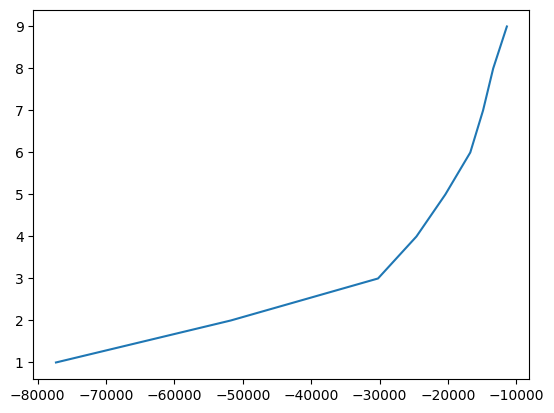

In [37]:
plt.plot(score, Ks)